Predicting Credit Score with a Random Forest Model

In [5]:
#import dependencies

import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import re
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy import mean
from statistics import mean
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error



DATA CLEANING

In [6]:
#import data to clean and check null values for test data
credit_test = pd.read_csv("Data/credit_test.csv")
credit_test.isnull().sum()

Loan ID                          353
Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [7]:
#import data to clean and check null values for train data
credit_train = pd.read_csv("Data/credit_train.csv")
credit_train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [8]:
#drop null values for both data frames

#drop null values
credit_test.dropna(how = 'any', inplace=True)
#drop null values
credit_train.dropna(how = 'any', inplace=True)

In [9]:
#check null values
credit_test.isnull().sum()

Loan ID                         0
Customer ID                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [10]:
#check null values
credit_train.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [11]:
#drop in correct credit scores for TEST
filtered_data_test = credit_test[credit_test['Credit Score'] <= 850].drop(['Purpose', 'Home Ownership','Loan ID', 'Customer ID'], axis=1)
# Print the filtered dataset
filtered_data_test

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,153494.0,Short Term,709.0,871112.0,2 years,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,176242.0,Short Term,727.0,780083.0,10+ years,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,321992.0,Short Term,744.0,1761148.0,10+ years,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
9,266288.0,Long Term,683.0,2031518.0,2 years,12443.10,24.4,56.0,8.0,2.0,31445.0,251130.0,2.0,0.0
11,258104.0,Short Term,723.0,1284514.0,7 years,6368.99,14.6,64.0,12.0,0.0,128402.0,266904.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,110946.0,Short Term,736.0,632396.0,2 years,13122.16,14.1,48.0,17.0,0.0,214966.0,324126.0,0.0,0.0
9990,260128.0,Long Term,611.0,3182519.0,4 years,79563.07,20.7,40.0,47.0,0.0,1398932.0,3673032.0,0.0,0.0
9994,442596.0,Short Term,739.0,1528968.0,7 years,19494.38,16.7,79.0,11.0,0.0,419235.0,656876.0,0.0,0.0
9996,132550.0,Short Term,718.0,763192.0,4 years,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0


In [12]:
#drop in correct credit scores for TRAIN
filtered_data_train = credit_train[credit_train['Credit Score'] <= 850].drop(['Purpose', 'Home Ownership','Loan ID', 'Customer ID'], axis=1)
# Print the filtered dataset
filtered_data_train

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99993,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


USING THE FILTER DATA TRAIN DF

In [13]:
# Clean up the "Years in Current Job" column
filtered_data_train['Years in current job'] = filtered_data_train['Years in current job'].astype(str)
filtered_data_train['Years in current job'] = filtered_data_train['Years in current job'].str.replace(r'[^\d]+', '', regex=True)
filtered_data_train['Years in current job'] = filtered_data_train['Years in current job'].str.replace(r' years', '', regex=True)
filtered_data_train['Years in current job'] = pd.to_numeric(filtered_data_train['Years in current job'], errors='coerce')
filtered_data_train.dropna(subset=['Years in current job'], inplace=True)
filtered_data_train['Years in current job'] = filtered_data_train['Years in current job'].astype(float)

In [14]:
# Convert "charges off" to 1 and "paid off" to 0 and convert to integer in TRAIN
filtered_data_train["Loan Status"] = filtered_data_train["Loan Status"].map({"Charged Off": 1, "Fully Paid": 0}).astype(int)

In [15]:
#convert "short term" to 0 and "long term" to 1 an convert to integer 
filtered_data_train["Term"] = filtered_data_train["Term"].map({"Long Term": 1, "Short Term": 0}).astype(int)

In [16]:
#check if coverted
filtered_data_train.value_counts("Loan Status")

Loan Status
0    28972
1     5496
Name: count, dtype: int64

In [17]:
#check if coverted for term
filtered_data_train.value_counts("Term")

Term
0    24671
1     9797
Name: count, dtype: int64

CREATE RANDOM FOREST MODEL

In [18]:
# Define features set
X = filtered_data_train.copy()
X.drop("Credit Score", axis=1, inplace=True)
X.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,0,99999999.0,0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,0,217646.0,0,1184194.0,1.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,0,548746.0,0,2559110.0,2.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,0,99999999.0,0,714628.0,3.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,0,99999999.0,0,776188.0,1.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [19]:
# Define target vector
y = filtered_data_train["Credit Score"].ravel()
y[:5]

array([741., 730., 678., 728., 740.])

In [20]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [22]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [23]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

fitting the random forest model

In [24]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [25]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

making predictions using the random forest model

In [26]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

R2 score


In [27]:
rf_model.score(X_test_scaled,y_test)

0.2658116366912717

Feature Importance

In [28]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.6976201713759477, 'Term'),
 (0.11332549917673167, 'Current Loan Amount'),
 (0.05701004720834927, 'Maximum Open Credit'),
 (0.027657907883268593, 'Monthly Debt'),
 (0.024126555912081963, 'Loan Status'),
 (0.018753434201665746, 'Years of Credit History'),
 (0.018391064430298976, 'Current Credit Balance'),
 (0.013518817652461212, 'Annual Income'),
 (0.010910370254427223, 'Number of Open Accounts'),
 (0.010151636369485772, 'Months since last delinquent'),
 (0.003978408988601662, 'Number of Credit Problems'),
 (0.002593647348389447, 'Bankruptcies'),
 (0.0014250689367483354, 'Years in current job'),
 (0.0005373702615424883, 'Tax Liens')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

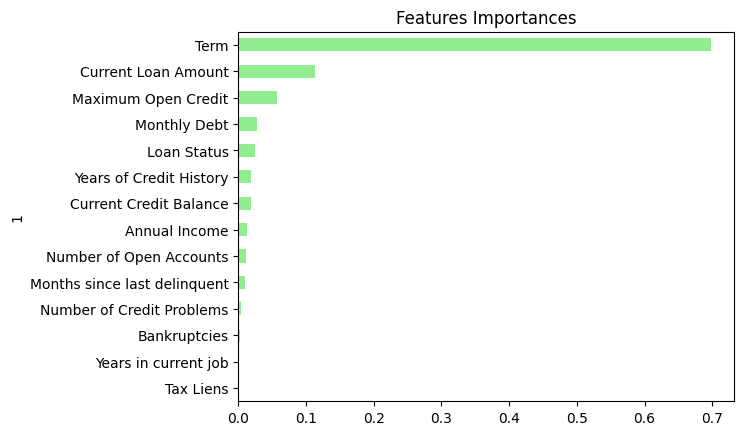

In [29]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

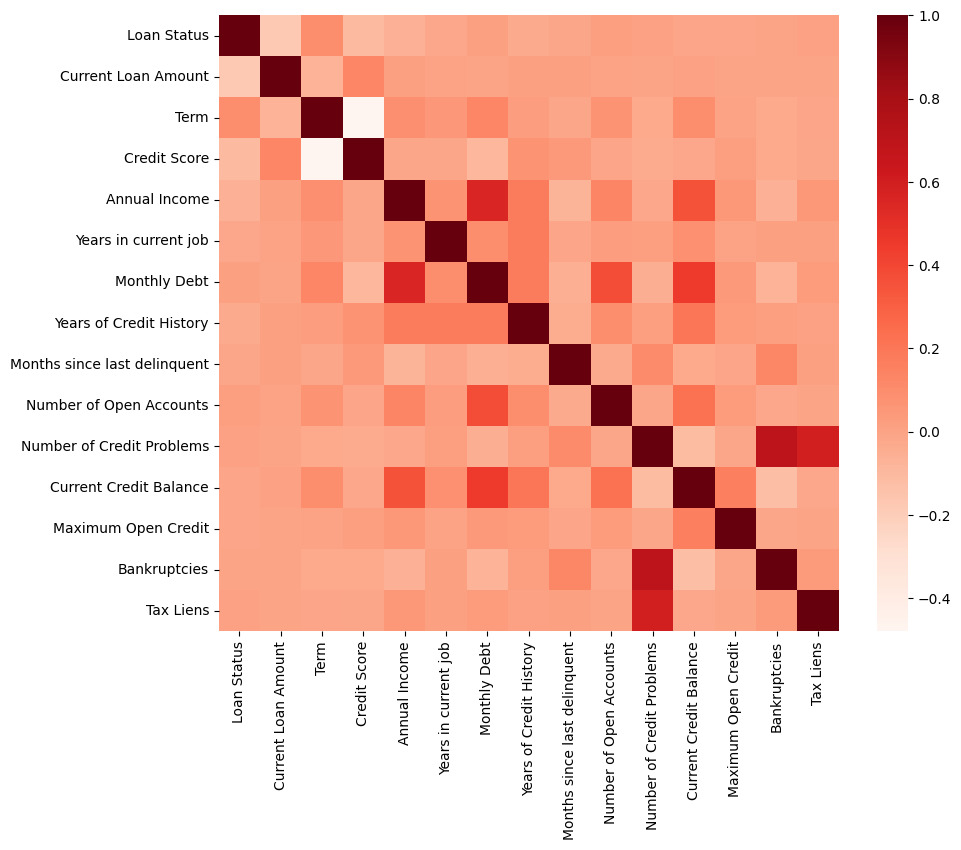

In [30]:
# Exploring correlation between features
plt.figure(figsize=(10,8))
cor = filtered_data_train.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

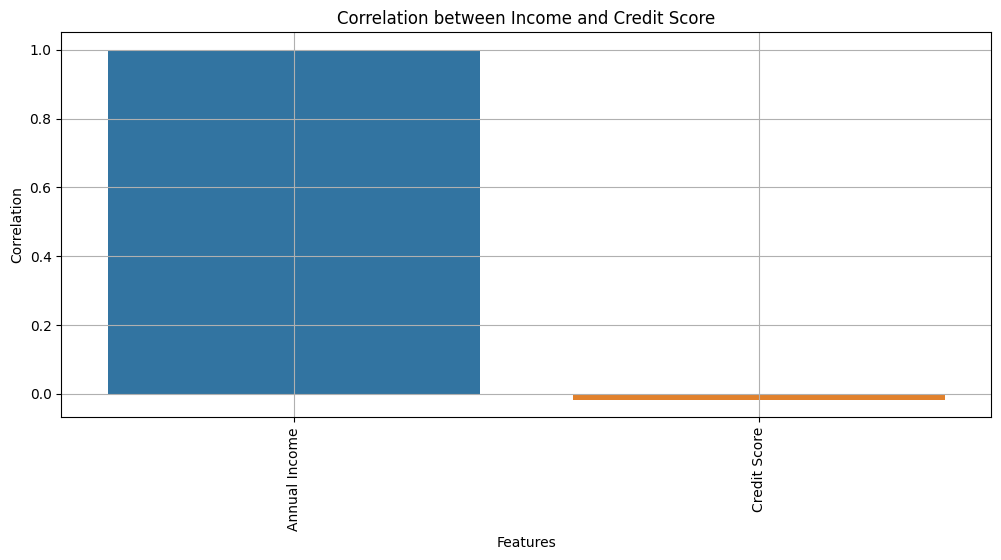

In [31]:
# Credit Scores per Income
corr_income_credit = filtered_data_train[["Annual Income", "Credit Score"]].corr()

plt.figure(figsize=(12, 5))
sns.barplot(x=corr_income_credit.index, y=corr_income_credit["Annual Income"])
plt.title("Correlation between Income and Credit Score")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

random forest regressor 


In [32]:
#create regressor model and train
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train_scaled, y_train)

In [33]:
#make predicts on test data 
prediction = rf.predict(X_test_scaled)

#R2 score
score5 = rf.score(X_test_scaled, y_test)
percentage = score5 * 100
print('R2: %.2f%%' % percentage)

R2: 26.58%


In [34]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.6976201713759477, 'Term'),
 (0.11332549917673167, 'Current Loan Amount'),
 (0.05701004720834927, 'Maximum Open Credit'),
 (0.027657907883268593, 'Monthly Debt'),
 (0.024126555912081963, 'Loan Status'),
 (0.018753434201665746, 'Years of Credit History'),
 (0.018391064430298976, 'Current Credit Balance'),
 (0.013518817652461212, 'Annual Income'),
 (0.010910370254427223, 'Number of Open Accounts'),
 (0.010151636369485772, 'Months since last delinquent'),
 (0.003978408988601662, 'Number of Credit Problems'),
 (0.002593647348389447, 'Bankruptcies'),
 (0.0014250689367483354, 'Years in current job'),
 (0.0005373702615424883, 'Tax Liens')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

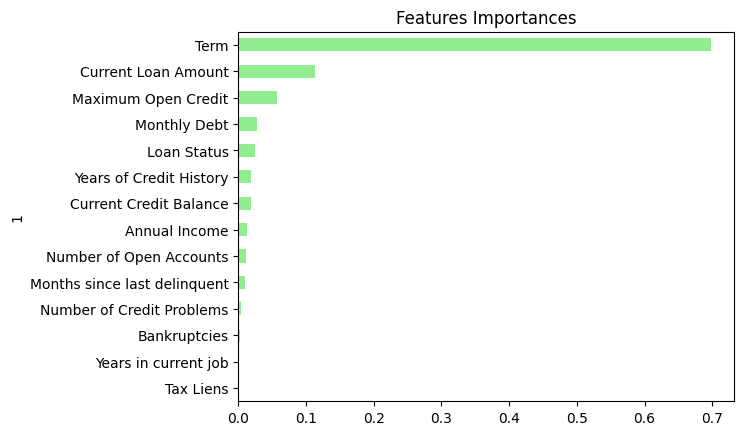

In [35]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

lack of data
bad data
improper tweaking

_________________________________________________________

Imbalance Dataset

SMOTE  (Synthetic Minority OverSampling Technique)

In [36]:
X = filtered_data_train.copy()
X.drop("Credit Score", axis=1, inplace=True)
y = filtered_data_train["Credit Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=18)

ros = RandomOverSampler()
over_X_train, over_y_train = ros.fit_resample(X_train, y_train)

rf_regressor = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=18)
rf_regressor.fit(over_X_train, over_y_train)

y_pred = rf_regressor.predict(X_test)


r2 = r2_score(y_test, y_pred)

print('R-squared (R2): %.3f' % r2)


R-squared (R2): -0.816
